In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
import scipy.io
from scipy import signal

import IPython

import os

PATH_IMG = "./imgs/"

print(os.getcwd())
print(os.listdir())

def cm_to_inch(value):
    return value/2.54

/home/andre/Documents/Git/STD_DCA0107/U1
['filtragem.ipynb', 'Projeto_Filtragem_remez.pdf', 'audio_ruidoso.wav', 'imgs', 'parametros.jpg', 'exemplo.wav', 'audio_filtrado.wav']


# Espectograma e FFT do áudio

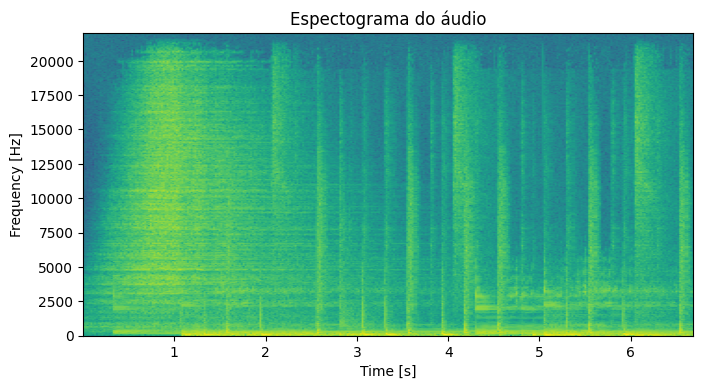

In [221]:
fs, data = scipy.io.wavfile.read("exemplo.wav")

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

spec, freqs, t, _ = plt.specgram(data, NFFT=1024, Fs=fs)

plt.title("Espectograma do áudio")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')

plt.savefig(PATH_IMG+"Espectograma_audio.png")

plt.show()

scipy.io.wavfile.write('exemplo.wav', fs, data.astype(np.int16))
IPython.display.Audio("exemplo.wav")

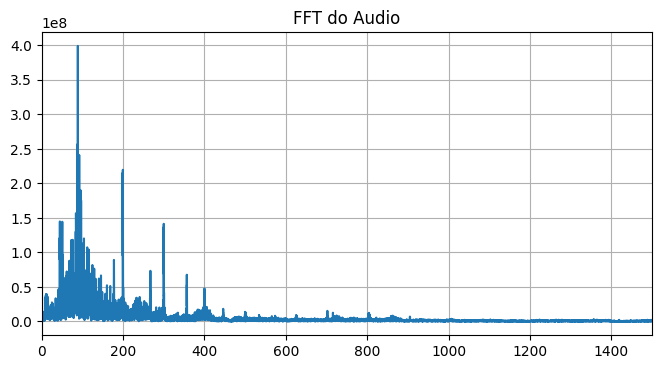

In [222]:
data_fft = fft(data)

Nfft = len(data_fft)

freqs = np.linspace(0, fs/2, int(Nfft/2+1))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.title('FFT do Audio')
plt.plot(freqs, abs(data_fft[0:len(freqs)]))
plt.grid()

plt.xlim(0, 1500)

plt.show()

# Adição do Ruído

$n(t) = \cos{(2\pi f_1 t)} + \cos{(2\pi f_2 t)}$

![Parametros](./parametros.jpg)

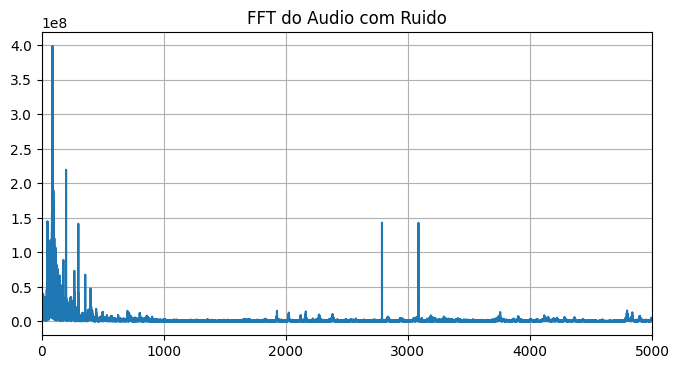

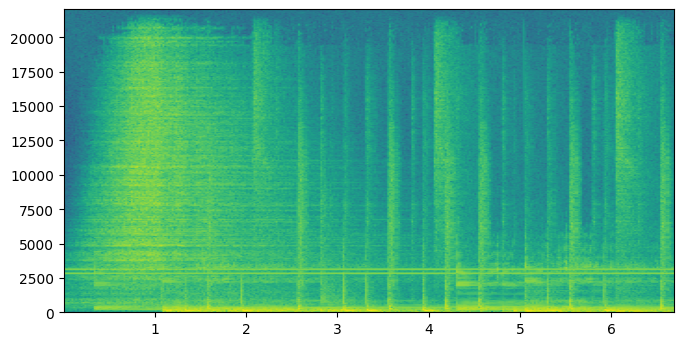

In [230]:
f1 = 2.8e3
f2 = 3.1e3

Amplitude = 1e3

time = np.linspace(0, t[len(t)-1], len(data))
n_t = Amplitude*np.cos(2 * np.pi * f1 * time) + Amplitude*np.cos(2 * np.pi * f2 * time)

data_ruido = data + n_t

data_ruido_fft = fft(data_ruido)

Nfft = len(data_ruido_fft)

freqs = np.linspace(0, fs/2, int(Nfft/2+1))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.title('FFT do Audio com Ruido')
plt.plot(freqs, abs(data_ruido_fft[0:len(freqs)]))
plt.grid()

plt.xlim(0, 5000)

plt.show()

scipy.io.wavfile.write('audio_ruidoso.wav', fs, data_ruido.astype(np.int16))
IPython.display.Audio("audio_ruidoso.wav")

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(data_ruido, NFFT=1024, Fs=fs)

scipy.io.wavfile.write('audio_ruidoso.wav', fs, data_ruido.astype(np.int16))
IPython.display.Audio("audio_ruidoso.wav")

# Realizando a Filtragem

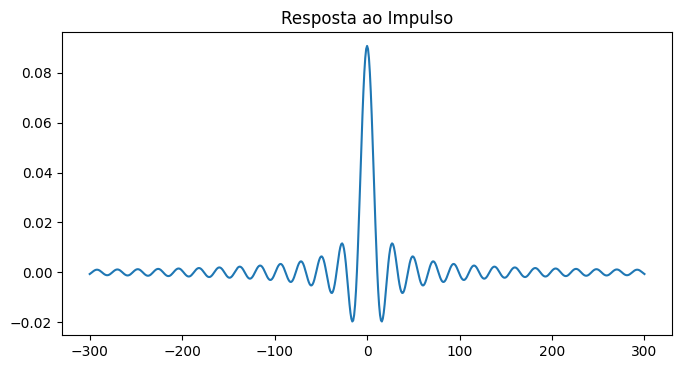

In [225]:
np.seterr(divide='ignore', invalid='ignore')

fc = 2000

wc = np.pi * fc/(fs/2)
N1 = 300
n1 = np.arange(-N1,(N1+1),1)

NSamples = len(n1)

hlp = wc/np.pi*(np.sin(wc*n1)) / (wc*n1)
hlp[n1==0] = wc / np.pi

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.plot(n1,hlp)
plt.title('Resposta ao Impulso')

plt.show()


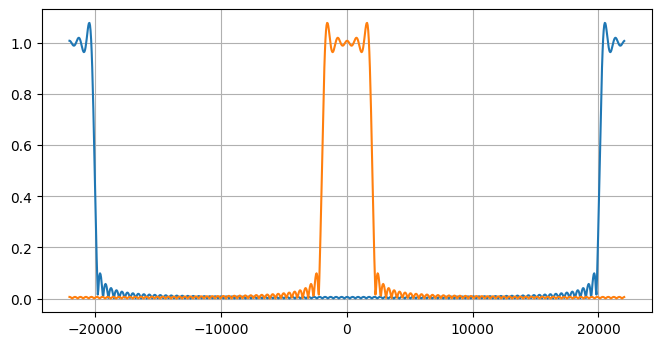

In [226]:
M = 101
M1 = -(M-1)/2
M2 = (M-1)/2

Idx = (n1>=M1) & (n1 <= M2)

w = np.ones(M)
h2 = np.array(hlp[Idx])

atenuacao = 100

beta = 0.1102 * (atenuacao - 8.7)
w2 = signal.windows.kaiser(M, beta=beta)

Hw = fft(h2,1000)

freq_plot = np.linspace(-fs/2, fs/2, len(Hw))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)

plt.plot(freq_plot,abs(Hw))
plt.plot(freq_plot, abs(fftshift(Hw)))
plt.grid()

plt.show()


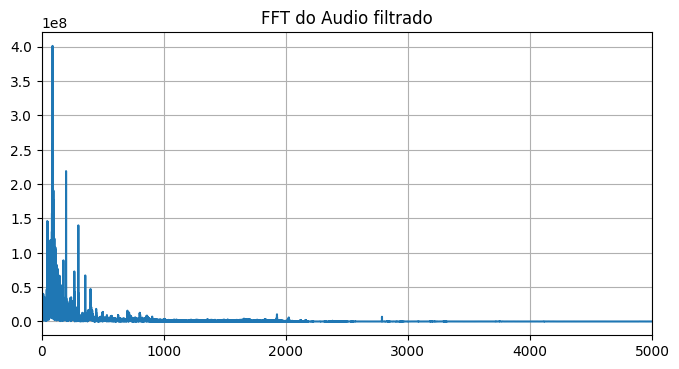

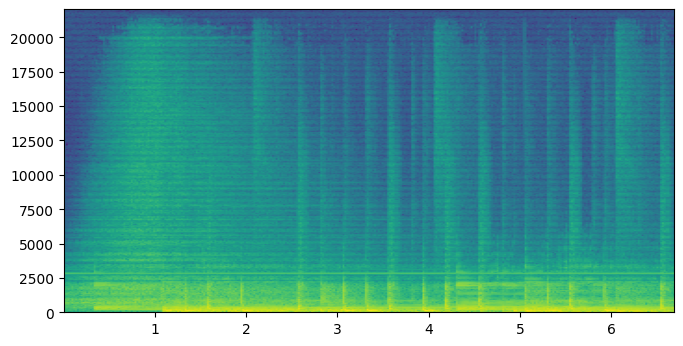

In [231]:
data_filtrado = signal.lfilter(h2, 1, data_ruido)

data_filtrado_fft = fft(data_filtrado)

Nfft = len(data_filtrado)

freqs = np.linspace(0, fs/2, int(Nfft/2+1))

figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
plt.title('FFT do Audio filtrado')
plt.plot(freqs, abs(data_filtrado_fft[0:len(freqs)]))
plt.grid()
plt.xlim(0, 5000)

plt.show()


figure(figsize=(cm_to_inch(20), cm_to_inch(10)), dpi=100)
Pxx, freqs, bins, im = plt.specgram(data_filtrado, NFFT=1024, Fs=fs)

scipy.io.wavfile.write('audio_filtrado.wav', fs, data_filtrado.astype(np.int16))
IPython.display.Audio("audio_filtrado.wav")